questions
* does vector RS take into account changes to polarization upon refraction? if not...
* can i use one method to get the diffraction effect on the polarization and another to propagate the resulting field?

In [1]:
from diffractio import degrees, mm, nm, np, plt, sp, um

from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_fields_XY import Vector_field_XY

AttributeError: 'numpy.ndarray' object has no attribute 'RS'

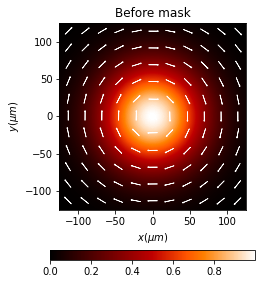

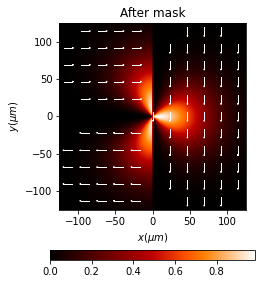

In [2]:
x0 = np.linspace(-125 * um, 125 * um, 256)
y0 = np.linspace(-125 * um, 125 * um, 256)

wavelength = 0.6328 * um

u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(
  r0=(0, 0),
  w0=(100 * um, 100 * um),
  z0=0 * um,
  A=1,
  theta=0. * degrees,
  phi=0 * degrees)

EM0 = Vector_source_XY(x0, y0, wavelength)
EM0.azimuthal_wave(u=u0, r0=(0, 0), radius=(200, 200))
EM0.draw(kind='ellipses')
plt.title('Before mask')
plt.savefig('usage12.png')


t0 = Scalar_mask_XY(x0, y0, wavelength)
t0.two_levels(level1=0, level2=1, x_edge=0, angle=0)

M0 = Vector_mask_XY(x=x0, y=y0, wavelength=wavelength)

state_0 = np.array([[1, 0],[0, 0]])
state_1 = np.array([[0, 0],[0, 1]])

M0.complementary_masks(t0, state_0, state_1)

EM1 = EM0 * M0
EM1.draw(kind='ellipses')
plt.title('After mask')
plt.savefig('usage13.png')

EM2 = EM1.RS(z=10 * mm)


EM2.draw(kind='ellipses')
plt.title('After propagation')
plt.savefig('usage14.png')